<a href="https://colab.research.google.com/github/good-thing/life_exam/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !wget https://raw.githubusercontent.com/good-thing/life_exam/main/LifeExpectancy1.csv

In [3]:
df=pd.read_csv('LifeExpectancy1_.csv')

In [4]:
df

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  Under-fiveDeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

<Axes: >

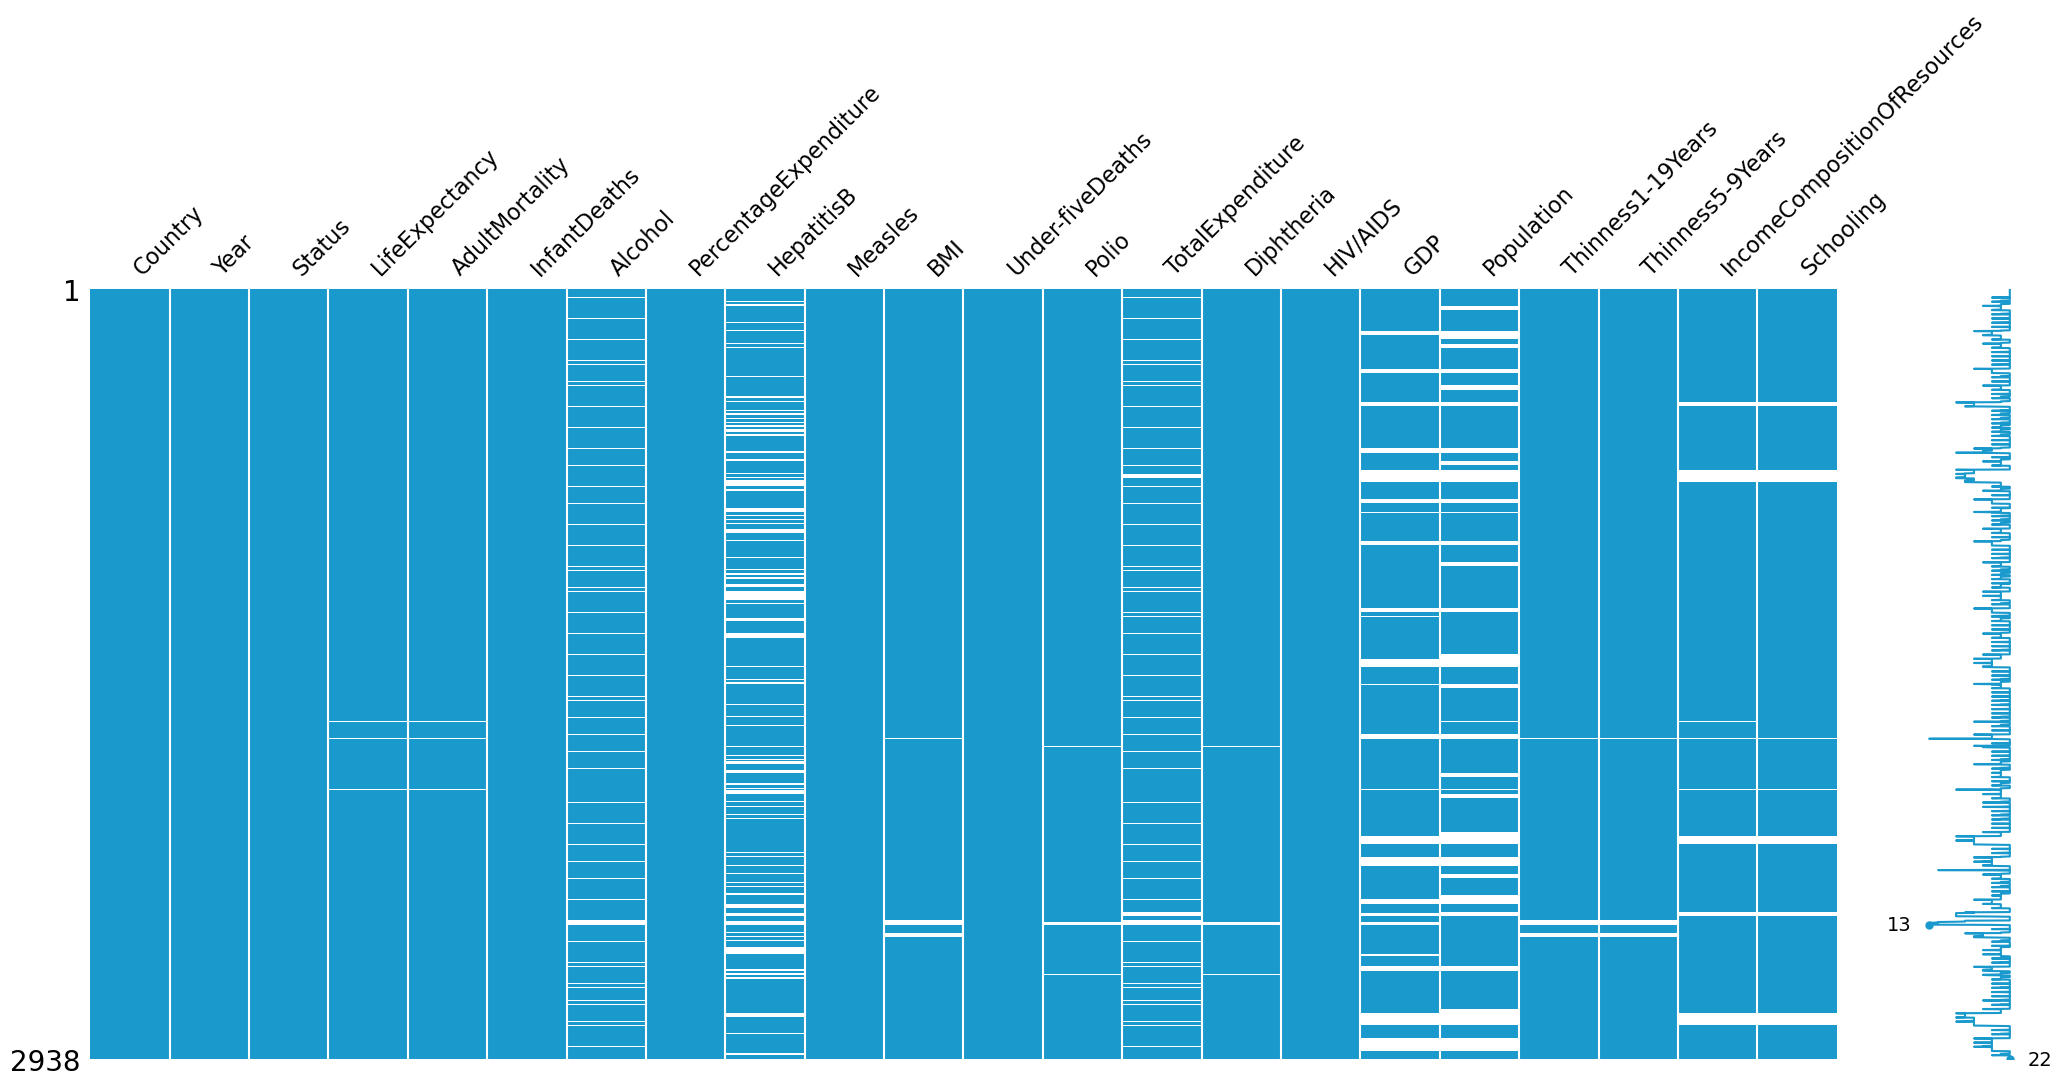

In [6]:
# 결측치 시각화
import missingno as msno
msno.matrix(df, color=(0.1, 0.6, 0.8))

<Axes: >

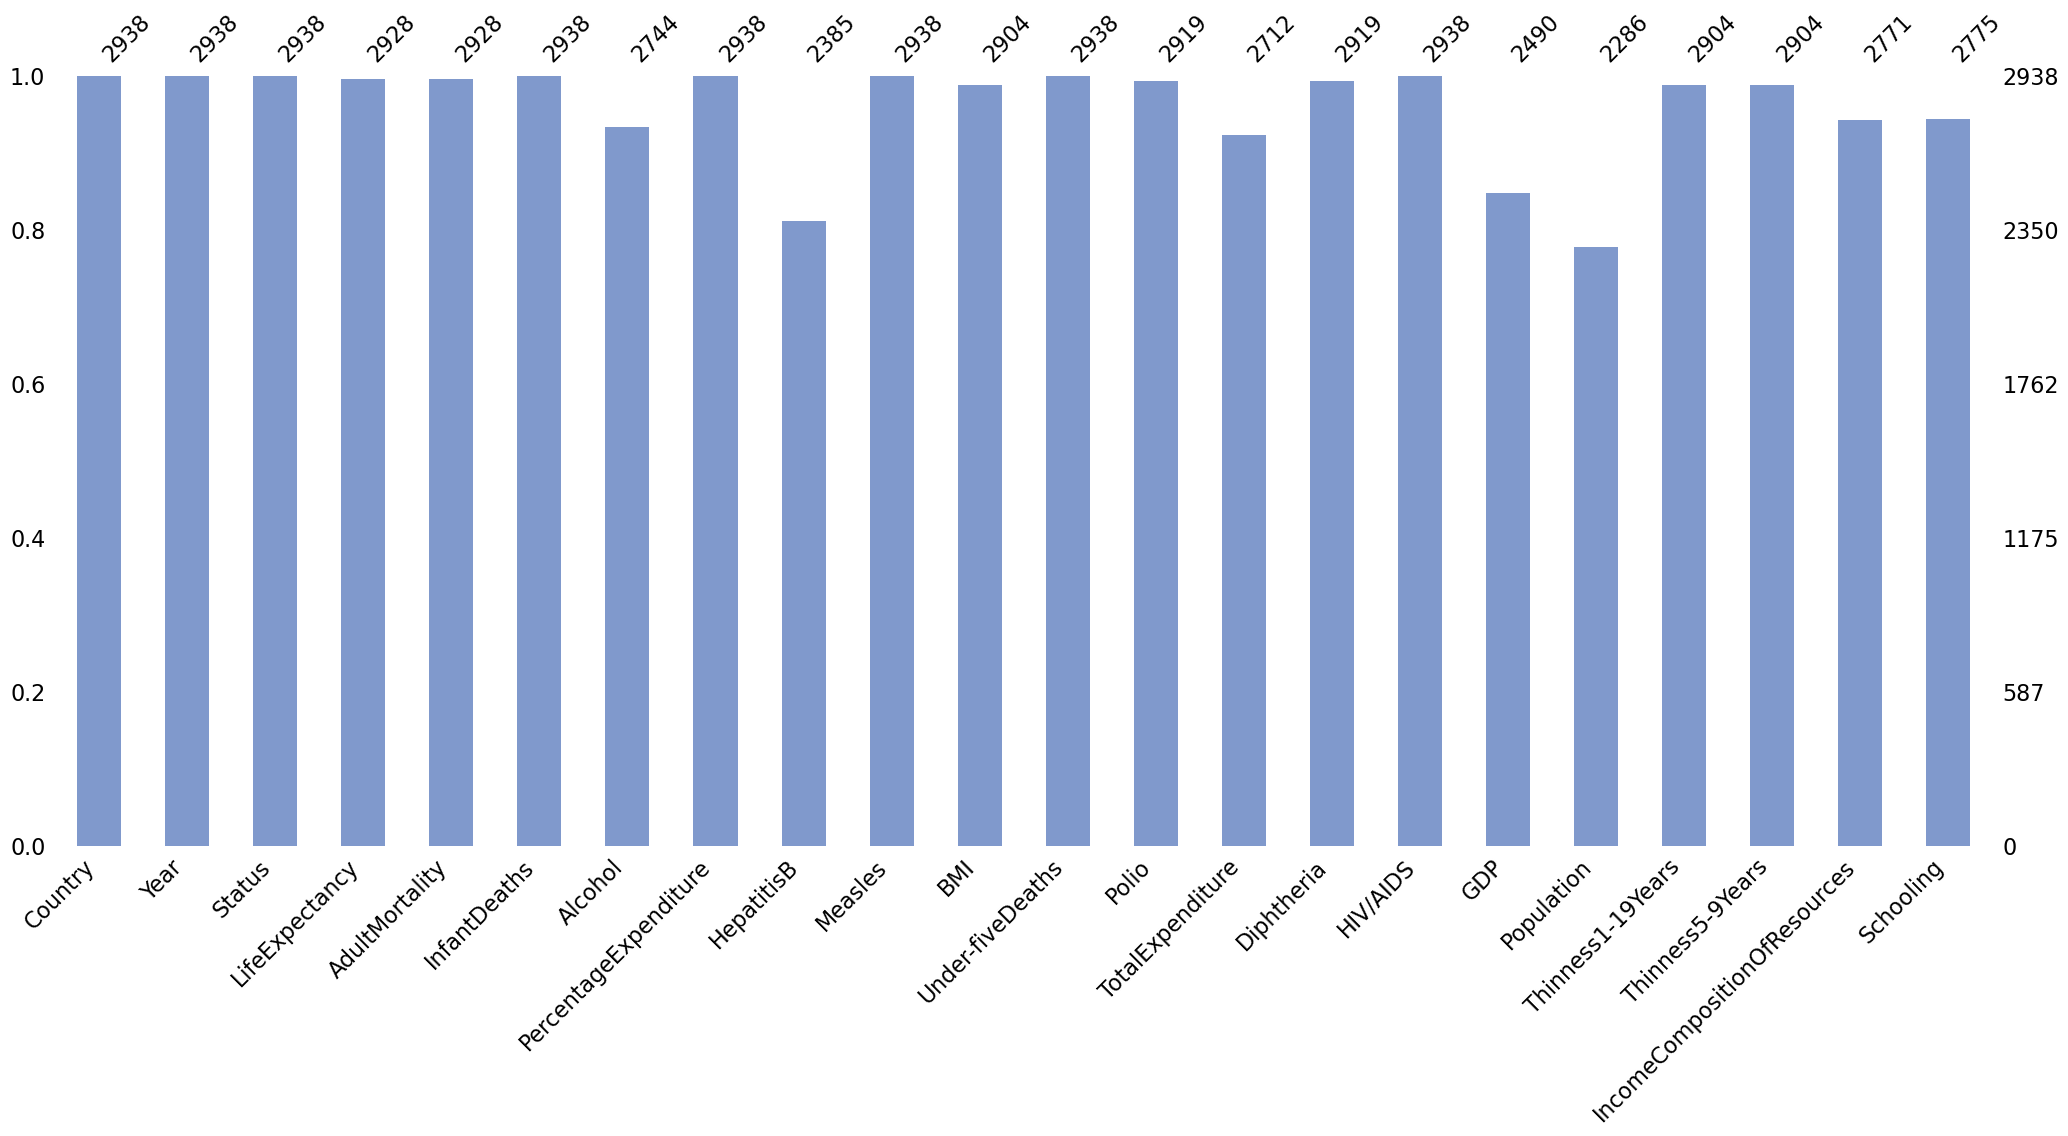

In [7]:
# 결측치 갯수 수치화
msno.bar(df, color=(0.5, 0.6, 0.8))

In [8]:
df.isna().sum(axis=0)        #  중앙값이랑 평균치로 결측값 대체 하기로 함

Country                           0
Year                              0
Status                            0
LifeExpectancy                   10
AdultMortality                   10
InfantDeaths                      0
Alcohol                         194
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
Under-fiveDeaths                  0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
Thinness1-19Years                34
Thinness5-9Years                 34
IncomeCompositionOfResources    167
Schooling                       163
dtype: int64

In [9]:
df.columns        # 중앙값으로 대체할 컬럼

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under-fiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness1-19Years',
       'Thinness5-9Years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [10]:
cols=['AdultMortality','PercentageExpenditure','HepatitisB','Polio','Diphtheria','GDP',
      'Population','Thinness1-19Years','Thinness5-9Years']

In [11]:
for col in cols:
    median_value=df[col].median()
    df[col]=df[col].fillna(median_value)

In [12]:
df=df.fillna(df.mean())          #남은 나머지 결측값 평균값으로 대체

/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_2013/4074514099.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())          #남은 나머지 결측값 평균값으로 대체


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  Under-fiveDeaths              2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

<Axes: >

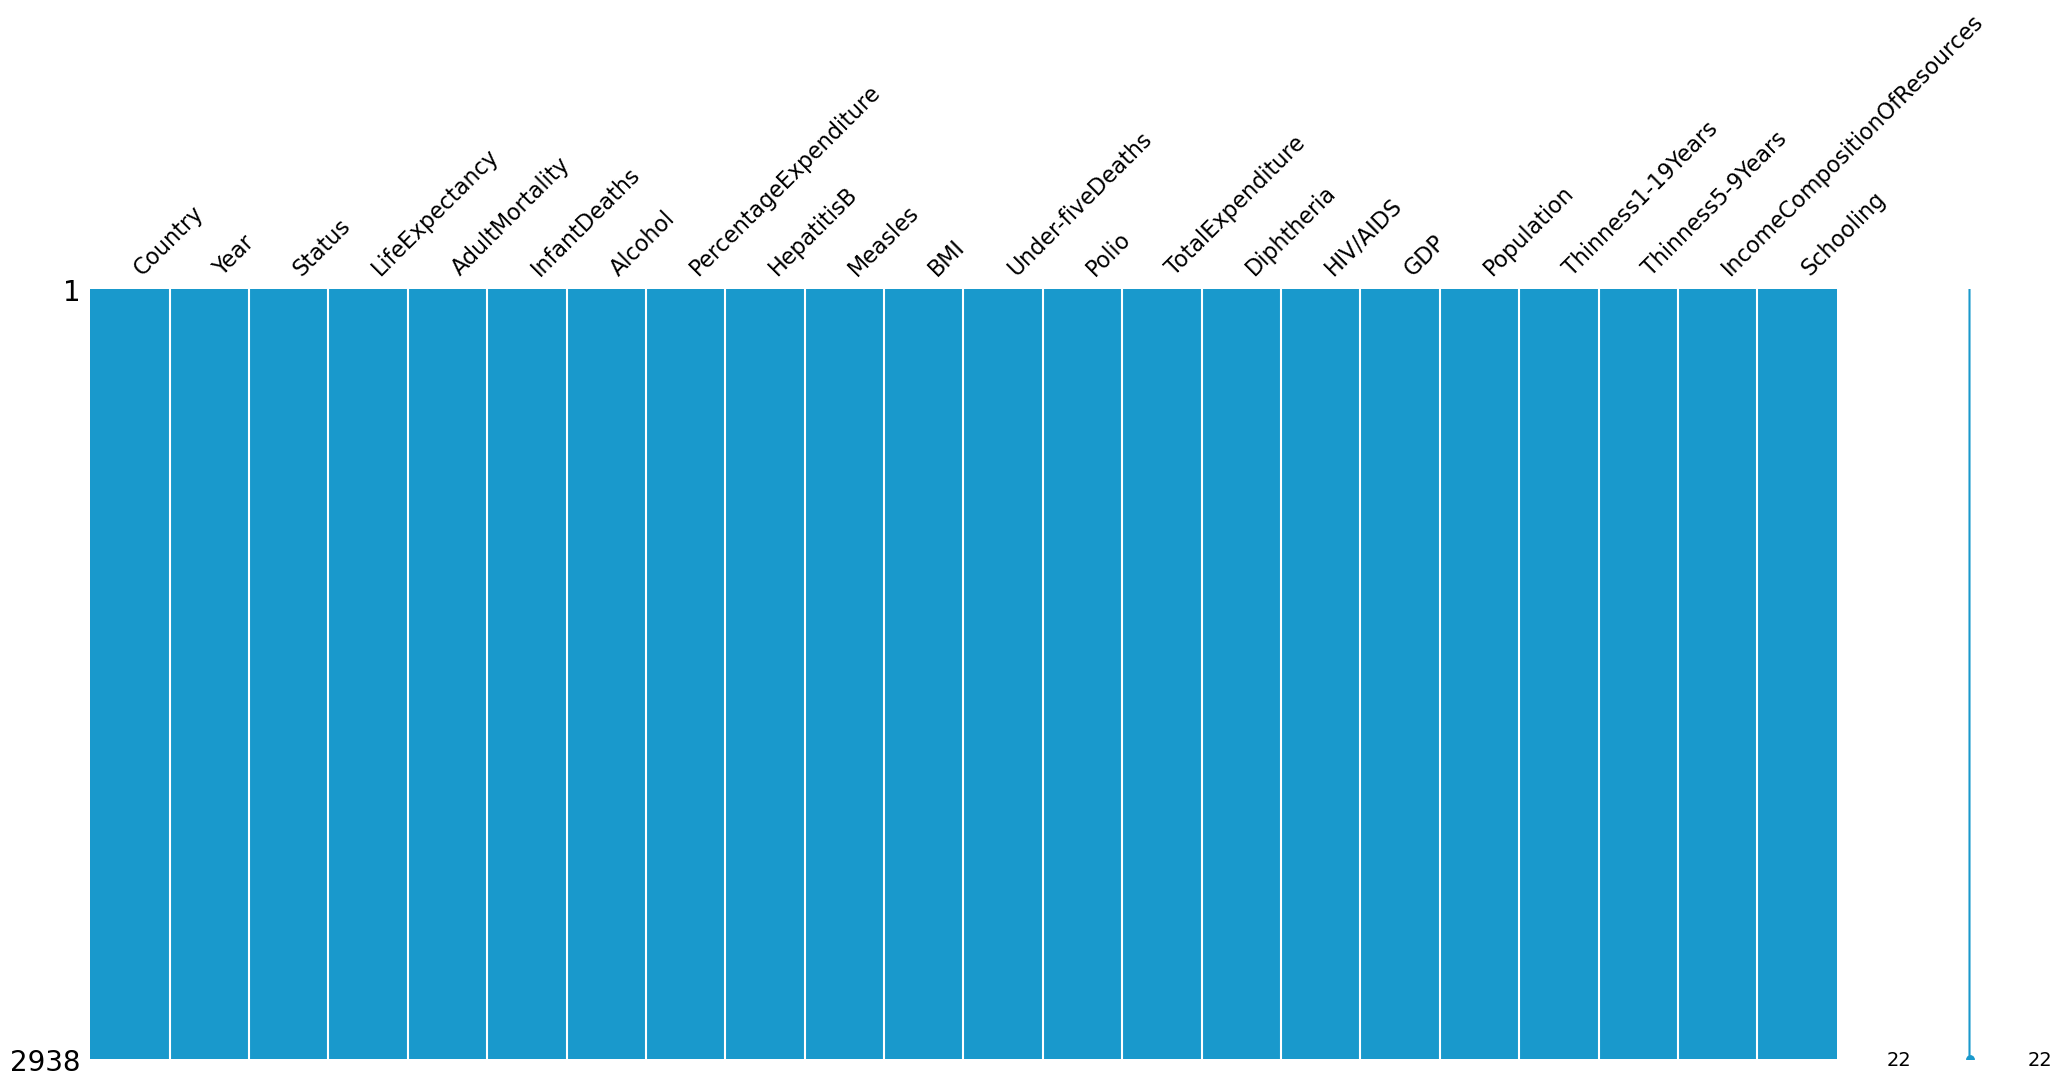

In [14]:
msno.matrix(df, color=(0.1, 0.6, 0.8))

In [15]:
df['LifeExpectancy'].value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: LifeExpectancy, Length: 363, dtype: int64

In [16]:
type(df)

pandas.core.frame.DataFrame

/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_2013/3198552079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_2013/3198552079.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greens")


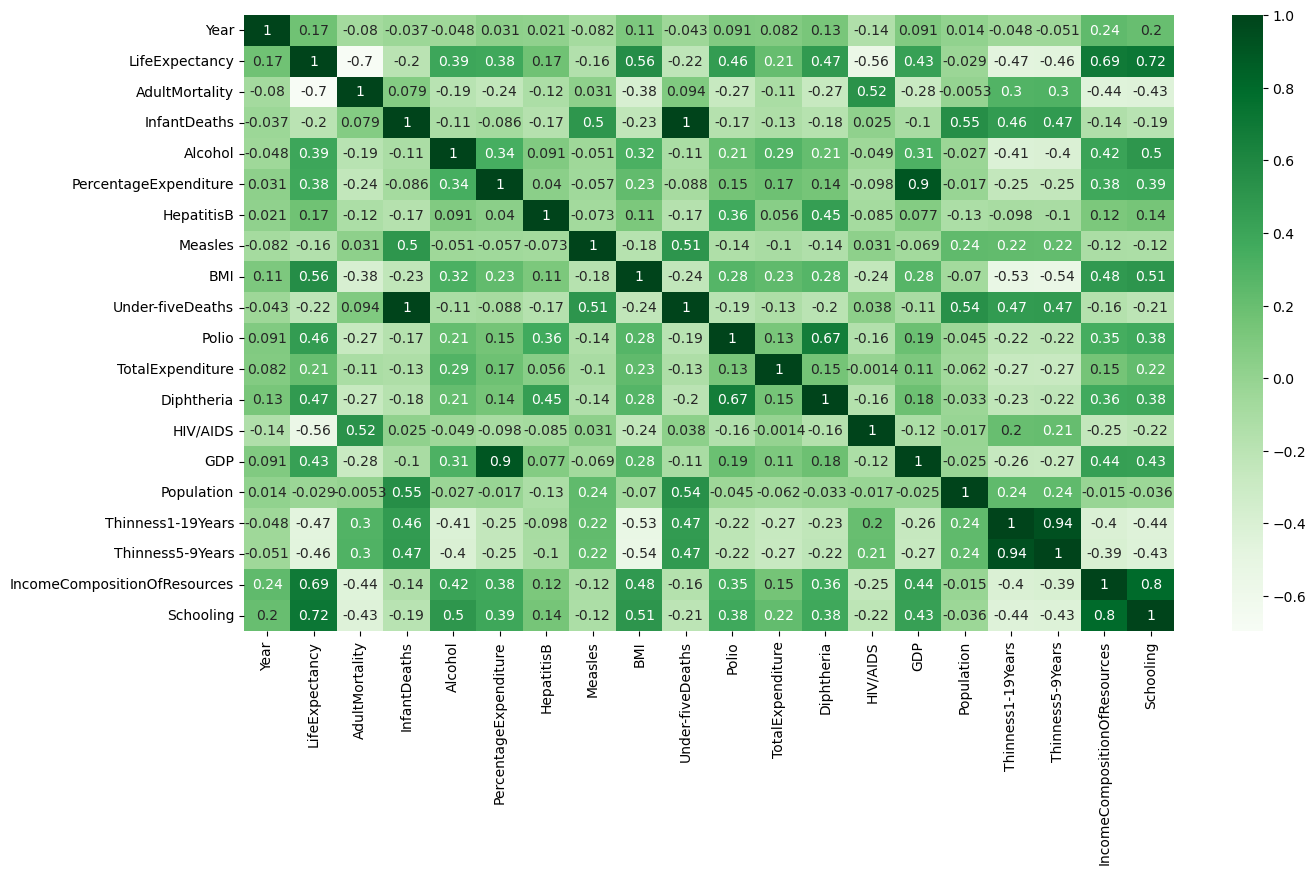

In [17]:
df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()                                  #0.75 이상인 값 지우기
#under-fiveDeaths,percentageExpenditure,IncomeCompositionOfResources,Thinness5-9years

In [18]:
# 값 지우기
colss =['Under-fiveDeaths','PercentageExpenditure','IncomeCompositionOfResources','Thinness5-9Years']

In [19]:
for col in colss:
    df=df.drop(col,axis=1)

<Axes: >

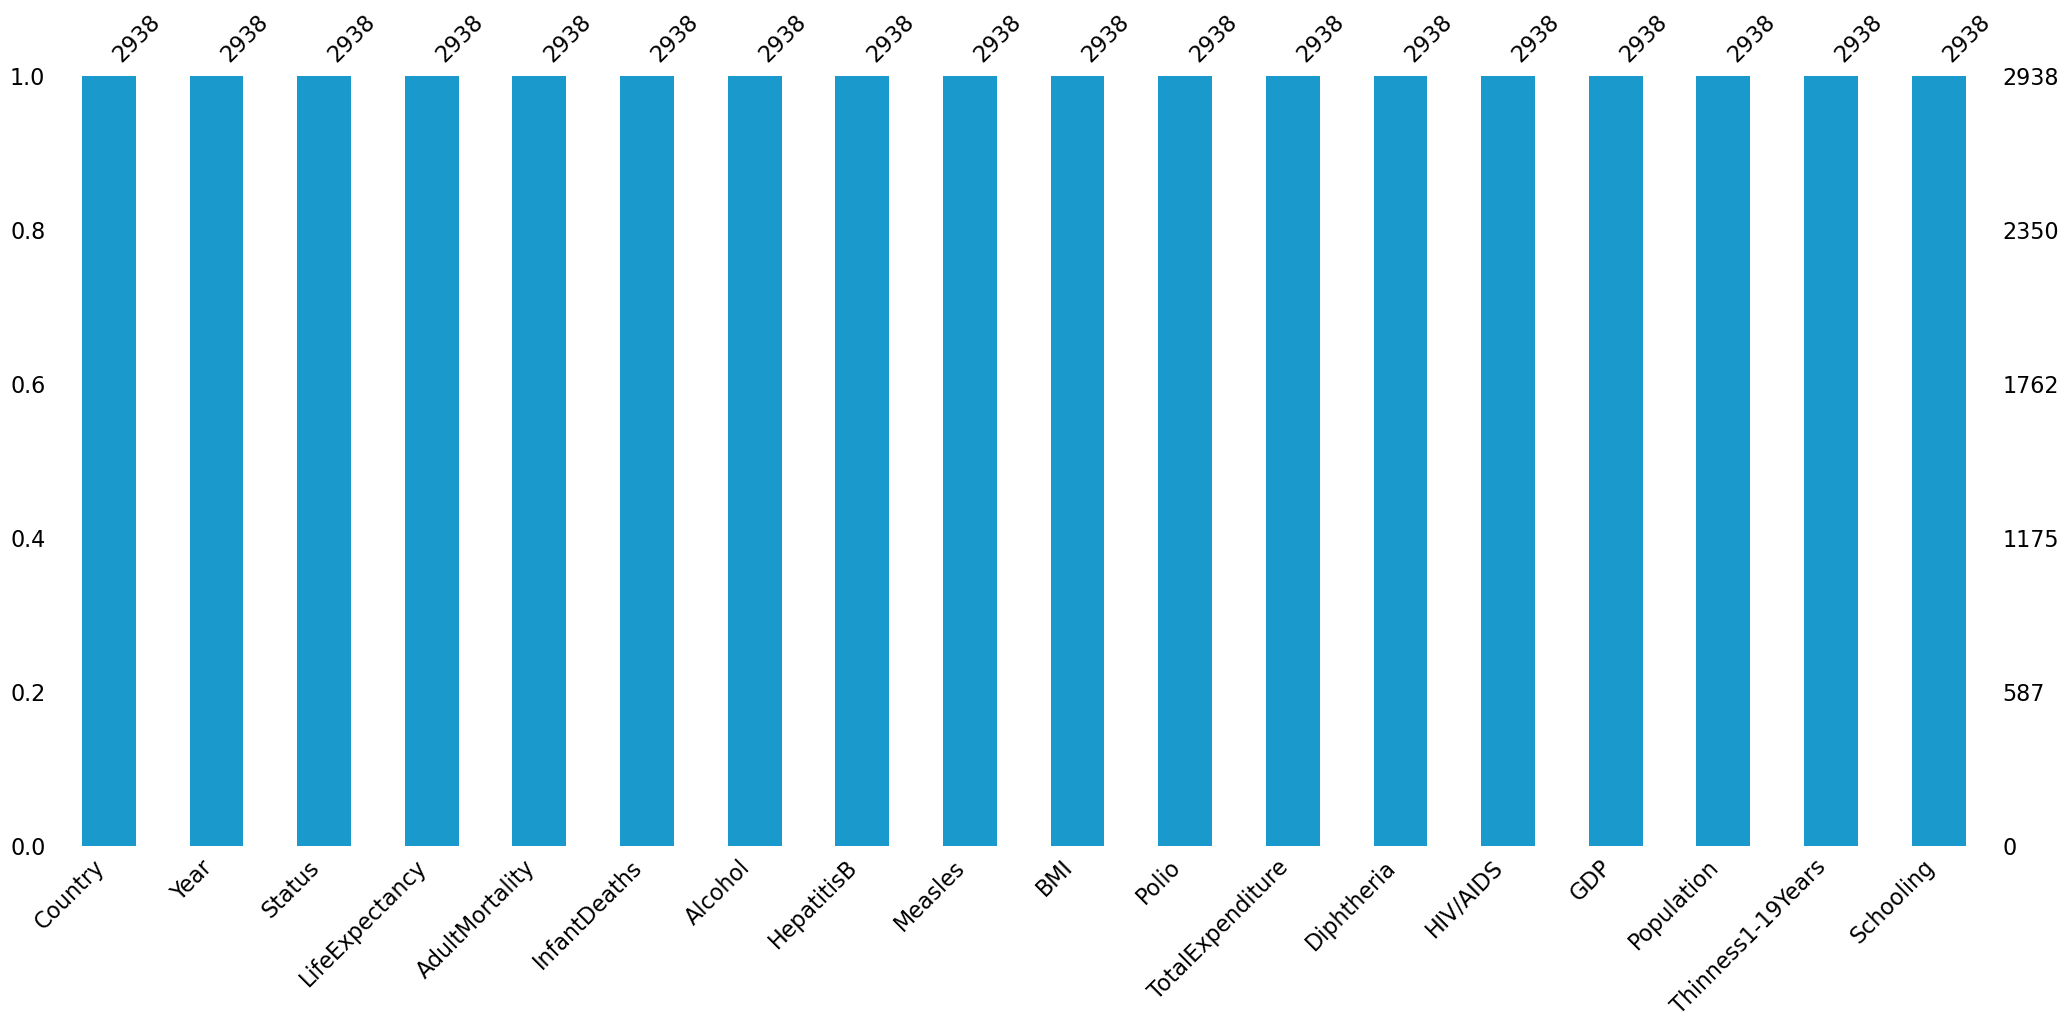

In [20]:
import missingno as msno
msno.bar(df, color=(0.1, 0.6, 0.8))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2938 non-null   object 
 1   Year               2938 non-null   int64  
 2   Status             2938 non-null   object 
 3   LifeExpectancy     2938 non-null   float64
 4   AdultMortality     2938 non-null   float64
 5   InfantDeaths       2938 non-null   int64  
 6   Alcohol            2938 non-null   float64
 7   HepatitisB         2938 non-null   float64
 8   Measles            2938 non-null   int64  
 9   BMI                2938 non-null   float64
 10  Polio              2938 non-null   float64
 11  TotalExpenditure   2938 non-null   float64
 12  Diphtheria         2938 non-null   float64
 13  HIV/AIDS           2938 non-null   float64
 14  GDP                2938 non-null   float64
 15  Population         2938 non-null   float64
 16  Thinness1-19Years  2938 

In [22]:
test=df[(df['Year']==2013)|(df['Year']==2014)|(df['Year']==2015)]
test

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,65.0,1154,19.1,6.0,8.16000,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,62.0,492,18.6,58.0,8.18000,62.0,0.1,612.696514,327582.0,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,64.0,430,18.1,62.0,8.13000,64.0,0.1,631.744976,31731688.0,17.7,9.9
16,Albania,2015,Developing,77.8,74.0,0,4.600000,99.0,0,58.0,99.0,6.00000,99.0,0.1,3954.227830,28873.0,1.2,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.510000,98.0,0,57.2,98.0,5.88000,98.0,0.1,4575.763787,288914.0,1.2,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Zambia,2014,Developing,61.1,314.0,28,0.010000,86.0,9,22.8,78.0,4.99000,86.0,4.3,1738.882200,1562974.0,6.3,12.5
2908,Zambia,2013,Developing,63.0,328.0,29,2.410000,79.0,35,22.3,74.0,4.99000,79.0,4.8,185.793359,1515321.0,6.4,12.5
2922,Zimbabwe,2015,Developing,67.0,336.0,22,4.602861,87.0,0,31.8,88.0,5.93819,87.0,6.2,118.693830,15777451.0,5.6,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.500000,91.0,0,31.3,92.0,6.44000,91.0,6.3,127.474620,15411675.0,5.9,10.3


In [23]:
train=df[(df['Year']!=2013)&(df['Year']!=2014)&(df['Year']!=2015)]
train

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Schooling
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,66.0,1989,16.7,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,63.0,2861,16.2,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,64.0,1599,15.7,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


<Axes: >

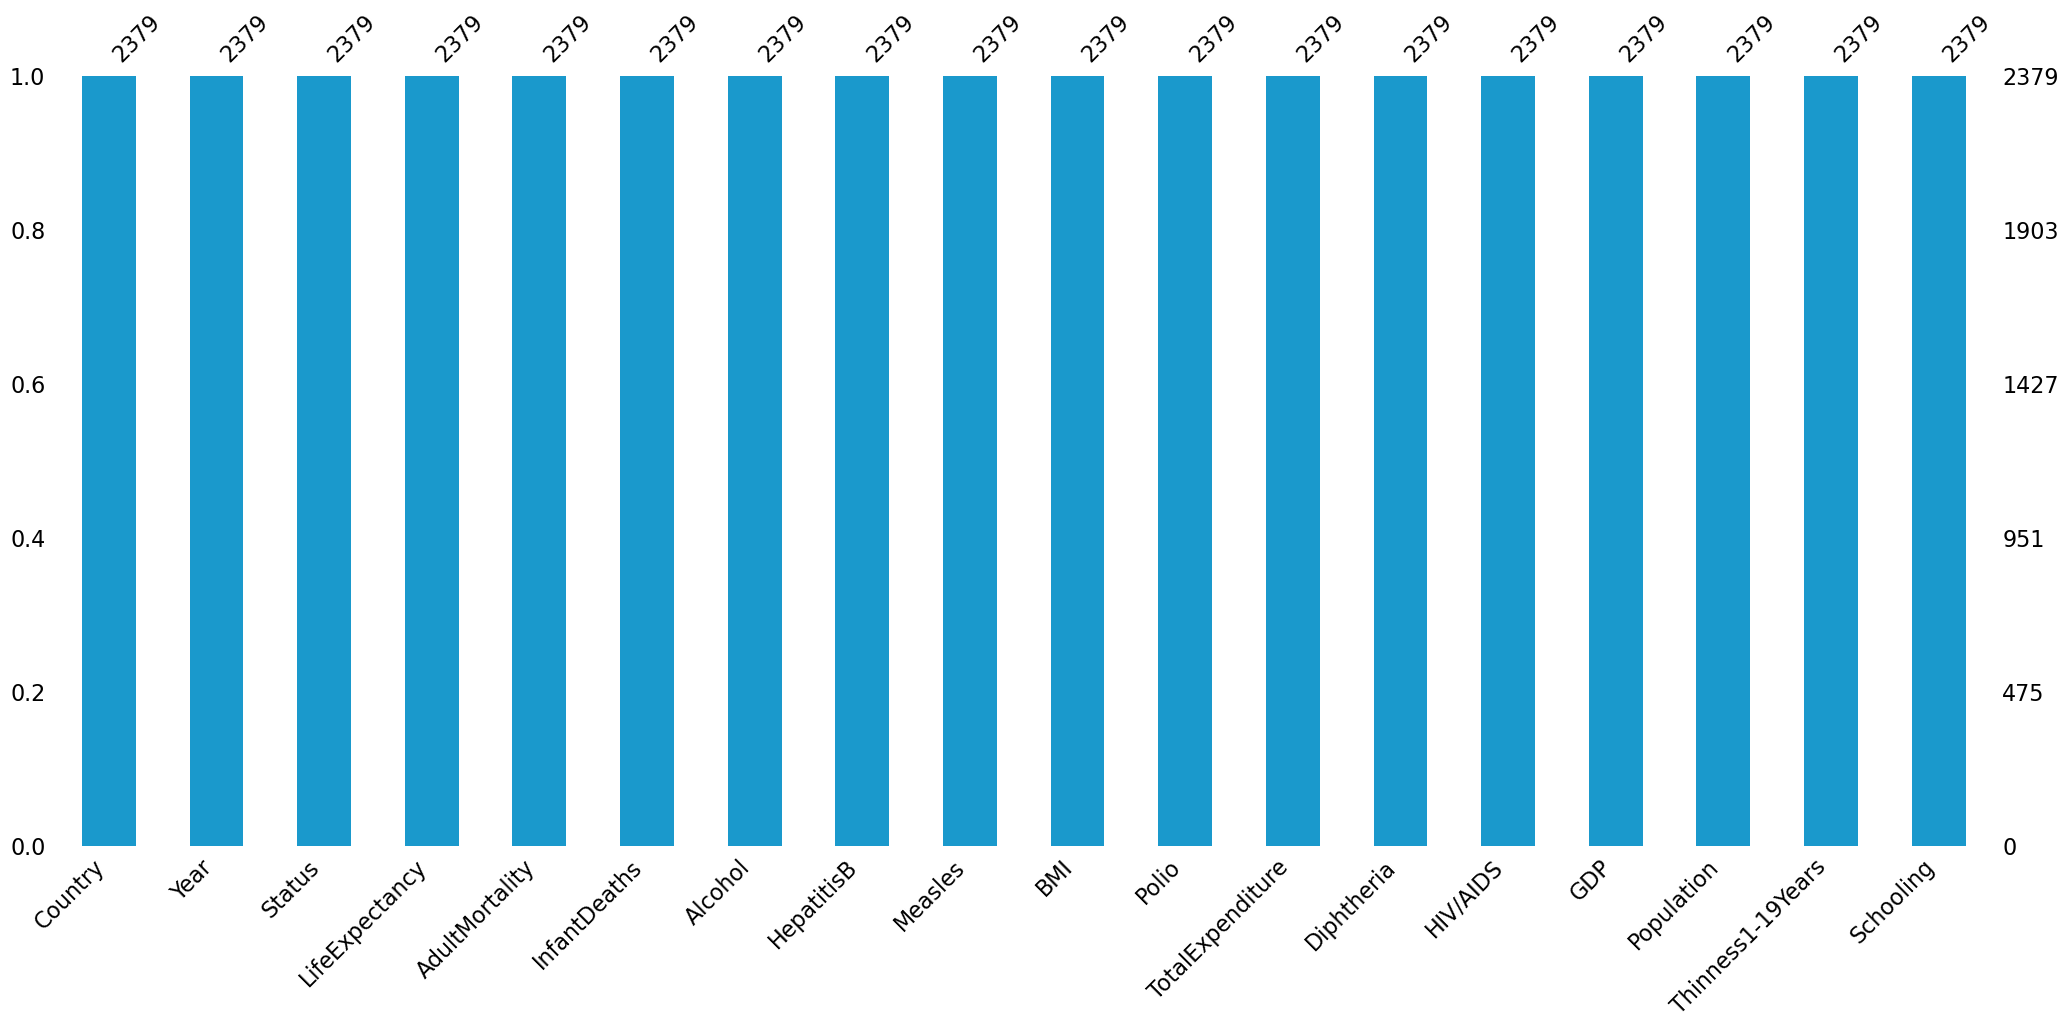

In [24]:
msno.bar(train, color=(0.1, 0.6, 0.8))

<Axes: >

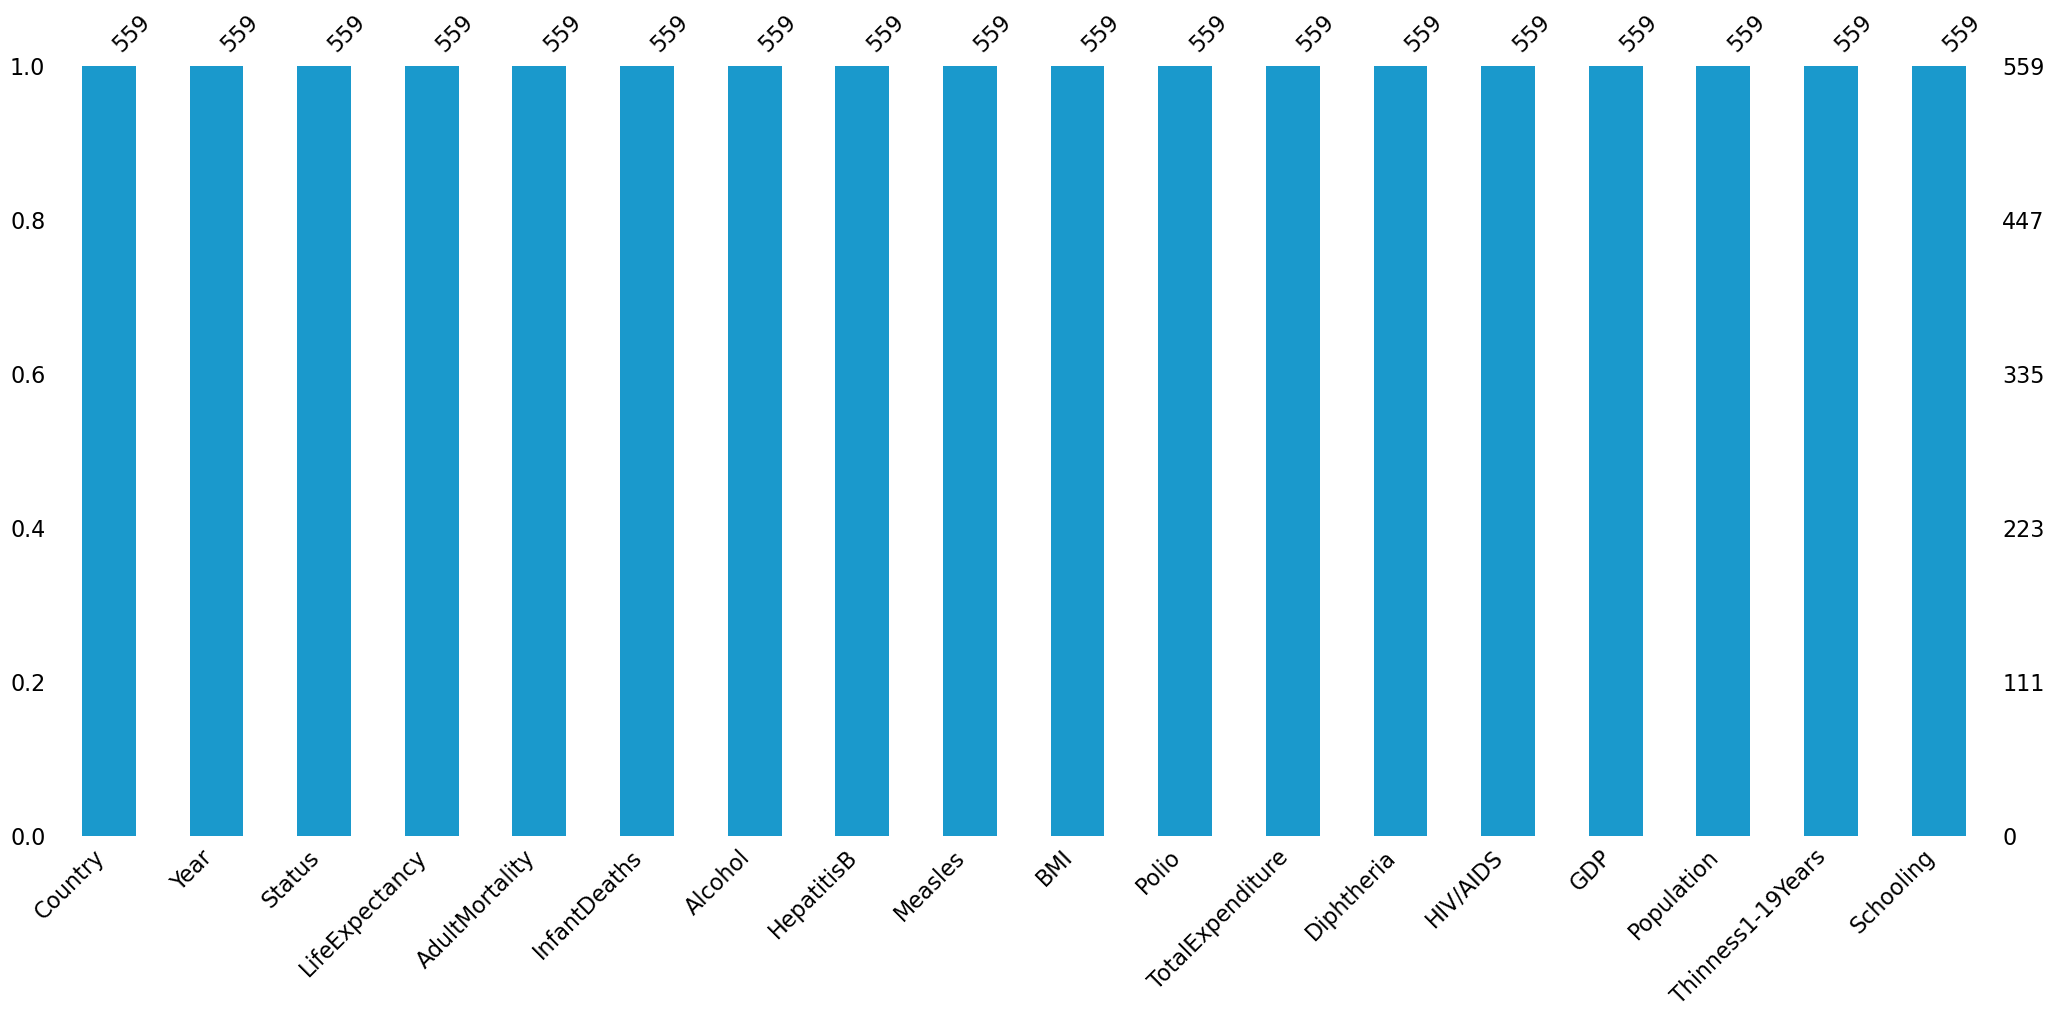

In [25]:
msno.bar(test, color=(0.1, 0.6, 0.8))

In [26]:
X_train= train.drop("LifeExpectancy",axis=1)
y_train= train['LifeExpectancy']
X_test= test.drop("LifeExpectancy",axis=1)
y_test= test['LifeExpectancy']

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2379, 17), (559, 17), (2379,), (559,))

##스케일링

In [28]:
df.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness1-19Years', 'Schooling'],
      dtype='object')

In [29]:
num_cols=['Year', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness1-19Years', 'Schooling']
cat_cols=['Country','Status']

In [30]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder(sparse_output=False)
X_train_cat=oe.fit_transform(X_train[cat_cols])
X_test_cat = oe.fit_transform(X_test[cat_cols])
X_train_cat

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [31]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train_num=ss.fit_transform(X_train[num_cols])
X_test_num = ss.fit_transform(X_test[num_cols])
X_train_num

array([[ 1.60356745,  0.80852444,  0.29992579, ..., -0.11812411,
         2.91619176, -0.60525521],
       [ 1.33630621,  0.83188919,  0.3160335 , ..., -0.13182378,
         2.98348218, -0.69571907],
       [ 1.06904497,  0.86304219,  0.34019508, ..., -0.13364374,
         3.02834246, -0.78618294],
       ...,
       [-1.06904497, -0.74133728, -0.05444394, ..., -0.18623412,
        -0.8296418 , -0.54494597],
       [-1.33630621,  4.03285989, -0.05444394, ...,  0.0472044 ,
        -0.73992123, -0.60525521],
       [-1.60356745,  3.86930664, -0.0624978 , ...,  0.04445985,
         1.36851203, -0.60525521]])

In [32]:
X_train_s=np.concatenate((X_train_cat,X_train_num),axis=1)
X_test_s = np.concatenate((X_test_cat,X_test_num), axis=1)
X_train_s

array([[ 1.        ,  0.        ,  0.        , ..., -0.11812411,
         2.91619176, -0.60525521],
       [ 1.        ,  0.        ,  0.        , ..., -0.13182378,
         2.98348218, -0.69571907],
       [ 1.        ,  0.        ,  0.        , ..., -0.13364374,
         3.02834246, -0.78618294],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.18623412,
        -0.8296418 , -0.54494597],
       [ 0.        ,  0.        ,  0.        , ...,  0.0472044 ,
        -0.73992123, -0.60525521],
       [ 0.        ,  0.        ,  0.        , ...,  0.04445985,
         1.36851203, -0.60525521]])

In [33]:
pd.DataFrame(X_train_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Columns: 200 entries, 0 to 199
dtypes: float64(200)
memory usage: 3.6 MB


In [34]:
pd.DataFrame(X_test_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 210 entries, 0 to 209
dtypes: float64(210)
memory usage: 917.2 KB


In [35]:
y_train=y_train.values
y_test=y_test.values

NameError: name 'Y_train' is not defined

In [ ]:
pd.DataFrame(y_train).info()

In [ ]:
type(X_train_s),type(y_train)

##학습

- LinearRegression,RandomForestRegressor,SVR


#####LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train_s,Y_train)
model2 = lr.fit(X_test_s, Y_test)

In [ ]:
w = model.coef_ # 가중치
b = model.intercept_ # 절편
print(f'w = {w}, b = {b}')

In [ ]:
pred = model2.predict(X_test_s)
pred[:5]

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print('MSE:', mse)
print('RMSE:', np.sqrt(mse))

print('MAE:', mae)
print('R2:', r2)

In [ ]:
sns.scatterplot(x=Y_test,y=pred)
plt.xlabel('true')
plt.ylabel('prediction')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
r = rfr.fit(X_train_s, Y_train)
k = rfr.fit(X_test_s, Y_test)

In [ ]:
y_pred = rfr.predict(X_test_s)

In [ ]:
# RandomForestRegressor
plt.scatter(Y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

In [ ]:
# LinearRegression
plt.scatter(Y_test, pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(40,100)
plt.ylim(40,100)
plt.plot([40, 100], [40, 100], color='red')
plt.show()

In [ ]:
from sklearn.svm import SVR

svr = SVR()
a = svr.fit(X_train_s, Y_train)
preds = svr.predict(X_train_s)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(Y_train, preds)
mae = mean_absolute_error(Y_train, preds)
r2 = r2_score(Y_train, preds)

print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mae)
print('R2:', r2)

In [ ]:
# SVR
plt.scatter(Y_train, preds)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.plot([30, 100], [30, 100], color='red')
plt.show()